In [1]:
import pandas as pd
import numpy as np
import datetime
from sim import generate_simulation
from model_cancellations import get_otb_res, predict_cancellations

pd.options.display.max_rows = 150
pd.options.display.max_columns = 250

In [2]:
DATE_FMT = "%Y-%m-%d"
h1_capacity = 187
h2_capacity = 226
AOD = "2017-06-01"
AOD_dt = pd.to_datetime(AOD)

h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")
# h1_sim = pd.read_pickle("pickle/h1_sim.pick")
# h2_sim = pd.read_pickle("pickle/h2_sim.pick")

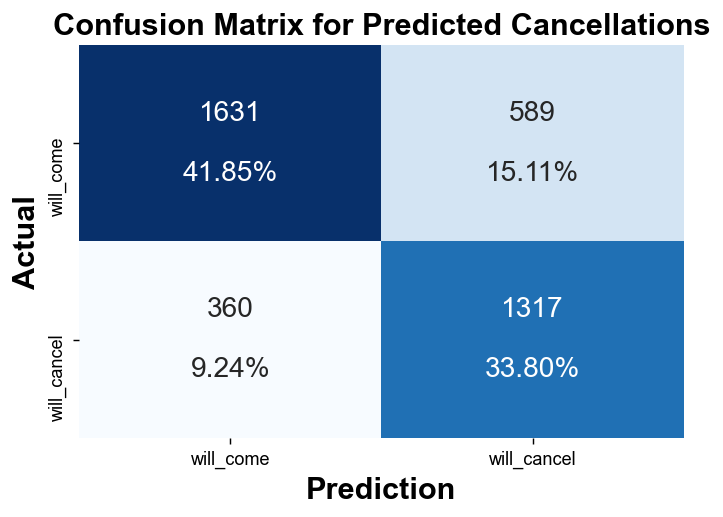

Optimal probability threshold (to maximize F-0.5): 0.74
F-0.5 Score: 0.708

Setting up simulation...
Estimating prices...
Pulling T-Minus OTB statistics...
Pulling STLY OTB statistics...
Training 32 models to obtain STLY statistics...

Pulling stats from STLY date 2016-06-02, stay_date 2016-06-02...
Pulling stats from STLY date 2016-06-02, stay_date 2016-06-03...
Pulling stats from STLY date 2016-06-02, stay_date 2016-06-04...
Pulling stats from STLY date 2016-06-02, stay_date 2016-06-05...
Pulling stats from STLY date 2016-06-02, stay_date 2016-06-06...
Pulling stats from STLY date 2016-06-02, stay_date 2016-06-07...
Pulling stats from STLY date 2016-06-02, stay_date 2016-06-08...
Pulling stats from STLY date 2016-06-02, stay_date 2016-06-09...
Pulling stats from STLY date 2016-06-02, stay_date 2016-06-10...
Pulling stats from STLY date 2016-06-02, stay_date 2016-06-11...
Pulling stats from STLY date 2016-06-02, stay_date 2016-06-12...
Pulling stats from STLY date 2016-06-02, stay_dat

In [3]:
h1_sim = generate_simulation(h1_dbd, AOD, 1, h1_res)

In [4]:
h1_sim.shape

(32, 258)

In [5]:
h1_sim.head(15)

,DOW,RoomsOTB,RevOTB,CxlForecast,TRN_RoomsOTB,TRN_RevOTB,TRN_CxlForecast,TRNP_RoomsOTB,TRNP_RevOTB,TRNP_CxlForecast,GRP_RoomsOTB,GRP_RevOTB,GRP_CxlForecast,CNT_RoomsOTB,CNT_RevOTB,CNT_CxlForecast,Date,TM05_Date,TM15_Date,TM30_Date,WeekEndDate,WE,WD,STLY_Date,Occ,RevPAR,RemSupply,ADR_OTB,TRN_ADR_OTB,TRNP_ADR_OTB,GRP_ADR_OTB,CNT_ADR_OTB,LYA_Occ,LYA_RoomsSold,LYA_ADR,LYA_RoomRev,LYA_RevPAR,LYA_NumCancels,LYA_TRN_RoomsSold,LYA_TRN_ADR,LYA_TRN_RoomRev,LYA_GRP_RoomsSold,LYA_GRP_ADR,LYA_GRP_RoomRev,LYA_TRNP_RoomsSold,LYA_TRNP_ADR,LYA_TRNP_RoomRev,LYA_CNT_RoomsSold,LYA_CNT_ADR,LYA_CNT_RoomRev,RoomsGapToLYA,ADR_GapToLYA,Actual_RoomsSold,Actual_ADR,Actual_RoomRev,Actual_TRN_RoomsSold,Actual_TRN_ADR,Actual_TRN_RoomRev,Realized_Cxls,SellingPrice,TM30_RoomsOTB,TM30_ADR_OTB,TM30_RevOTB,TM30_TRN_RoomsOTB,TM30_TRN_ADR_OTB,TM30_TRN_RevOTB,TM30_TRNP_RoomsOTB,TM30_TRNP_ADR_OTB,TM30_TRNP_RevOTB,TM30_GRP_RoomsOTB,TM30_GRP_ADR_OTB,TM30_GRP_RevOTB,TM30_CNT_RoomsOTB,TM30_CNT_ADR_OTB,TM30_CNT_RevOTB,TM15_RoomsOTB,TM15_ADR_OTB,TM15_RevOTB,TM15_TRN_RoomsOTB,TM15_TRN_ADR_OTB,TM15_TRN_RevOTB,TM15_TRNP_RoomsOTB,TM15_TRNP_ADR_OTB,TM15_TRNP_RevOTB,TM15_GRP_RoomsOTB,TM15_GRP_ADR_OTB,TM15_GRP_RevOTB,TM15_CNT_RoomsOTB,TM15_CNT_ADR_OTB,TM15_CNT_RevOTB,TM05_RoomsOTB,TM05_ADR_OTB,TM05_RevOTB,TM05_TRN_RoomsOTB,TM05_TRN_ADR_OTB,TM05_TRN_RevOTB,TM05_TRNP_RoomsOTB,TM05_TRNP_ADR_OTB,TM05_TRNP_RevOTB,TM05_GRP_RoomsOTB,TM05_GRP_ADR_OTB,TM05_GRP_RevOTB,TM05_CNT_RoomsOTB,TM05_CNT_ADR_OTB,TM05_CNT_RevOTB,TM30_RoomsPickup,TM30_ADR_Pickup,TM30_RevPickup,TM30_TRN_RoomsPickup,TM30_TRN_ADR_Pickup,TM30_TRN_RevPickup,TM30_TRNP_RoomsPickup,TM30_TRNP_ADR_Pickup,TM30_TRNP_RevPickup,TM30_GRP_RoomsPickup,TM30_GRP_ADR_Pickup,TM30_GRP_RevPickup,TM30_CNT_RoomsPickup,TM30_CNT_ADR_Pickup,TM30_CNT_RevPickup,TM15_RoomsPickup,TM15_ADR_Pickup,TM15_RevPickup,TM15_TRN_RoomsPickup,TM15_TRN_ADR_Pickup,...,TM15_CNT_ADR_Pickup,TM15_CNT_RevPickup,TM05_RoomsPickup,TM05_ADR_Pickup,TM05_RevPickup,TM05_TRN_RoomsPickup,TM05_TRN_ADR_Pickup,TM05_TRN_RevPickup,TM05_TRNP_RoomsPickup,TM05_TRNP_ADR_Pickup,TM05_TRNP_RevPickup,TM05_GRP_RoomsPickup,TM05_GRP_ADR_Pickup,TM05_GRP_RevPickup,TM05_CNT_RoomsPickup,TM05_CNT_ADR_Pickup,TM05_CNT_RevPickup,STLY_RoomsOTB,STLY_ADR_OTB,STLY_RevOTB,STLY_SellingPrice,STLY_TM05_RoomsOTB,STLY_TM15_ADR_OTB,STLY_TM05_RevOTB,STLY_TM15_RoomsOTB,STLY_TM05_ADR_OTB,STLY_TM15_RevOTB,STLY_TM30_RoomsOTB,STLY_TM30_ADR_OTB,STLY_TM30_RevOTB,STLY_TRN_RoomsOTB,STLY_TRN_ADR_OTB,STLY_TRN_RevOTB,STLY_TM05_TRN_RoomsOTB,STLY_TM05_TRN_ADR_OTB,STLY_TM05_TRN_RevOTB,STLY_TM15_TRN_RoomsOTB,STLY_TM15_TRN_ADR_OTB,STLY_TM15_TRN_RevOTB,STLY_TM30_TRN_RoomsOTB,STLY_TM30_TRN_ADR_OTB,STLY_TM30_TRN_RevOTB,STLY_TRNP_RoomsOTB,STLY_TRNP_ADR_OTB,STLY_TRNP_RevOTB,STLY_TM05_TRNP_RoomsOTB,STLY_TM05_TRNP_ADR_OTB,STLY_TM05_TRNP_RevOTB,STLY_TM15_TRNP_RoomsOTB,STLY_TM15_TRNP_ADR_OTB,STLY_TM15_TRNP_RevOTB,STLY_TM30_TRNP_RoomsOTB,STLY_TM30_TRNP_ADR_OTB,STLY_TM30_TRNP_RevOTB,STLY_GRP_RoomsOTB,STLY_GRP_ADR_OTB,STLY_GRP_RevOTB,STLY_TM05_GRP_RoomsOTB,STLY_TM05_GRP_ADR_OTB,STLY_TM05_GRP_RevOTB,STLY_TM15_GRP_RoomsOTB,STLY_TM15_GRP_ADR_OTB,STLY_TM15_GRP_RevOTB,STLY_TM30_GRP_RoomsOTB,STLY_TM30_GRP_ADR_OTB,STLY_TM30_GRP_RevOTB,STLY_CNT_RoomsOTB,STLY_CNT_ADR_OTB,STLY_CNT_RevOTB,STLY_TM05_CNT_RoomsOTB,STLY_TM05_CNT_ADR_OTB,STLY_TM05_CNT_RevOTB,STLY_TM15_CNT_RoomsOTB,STLY_TM15_CNT_ADR_OTB,STLY_TM15_CNT_RevOTB,STLY_TM30_CNT_RoomsOTB,STLY_TM30_CNT_ADR_OTB,STLY_TM30_CNT_RevOTB,STLY_TM30_RoomsPickup,STLY_TM30_ADR_Pickup,STLY_TM30_RevPickup,STLY_TM15_RoomsPickup,STLY_TM15_ADR_Pickup,STLY_TM15_RevPickup,STLY_TM05_RoomsPickup,STLY_TM05_ADR_Pickup,STLY_TM05_RevPickup,STLY_TM30_TRN_RoomsPickup,STLY_TM30_TRN_ADR_Pickup,STLY_TM30_TRN_RevPickup,STLY_TM15_TRN_RoomsPickup,STLY_TM15_TRN_ADR_Pickup,STLY_TM15_TRN_RevPickup,STLY_TM05_TRN_RoomsPickup,STLY_TM05_TRN_ADR_Pickup,STLY_TM05_TRN_RevPickup,STLY_RoomRev,STLY_TRN_RoomRev,STLY_TRNP_RoomRev,STLY_GRP_RoomRev,STLY_CNT_RoomRev,RoomsOTB_Pace,ADR_OTB_Pace,RevOTB_Pace,TRN_RoomsOTB_Pace,TRN_ADR_OTB_Pace,TRN_Rev

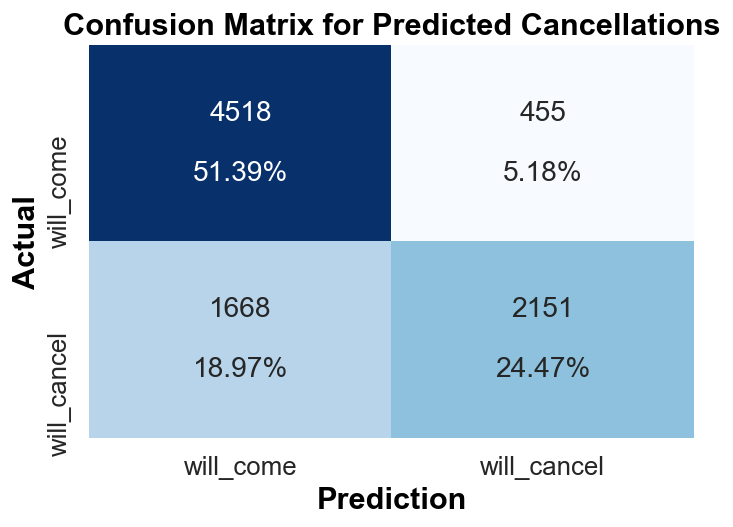

KeyboardInterrupt: 

In [6]:
h2_sim = generate_simulation(h2_dbd, AOD, 2, h2_res)

In [ ]:
h2_sim.head()

In [ ]:
h1_sim.to_pickle("pickle/h1_sim.pick")
h2_sim.to_pickle("pickle/h2_sim.pick")

In [ ]:
from model_cancellations import get_otb_res
import datetime
test = get_otb_res(h1_res,'2016-08-01')
mask = (test.ArrivalDate<='2016-08-05') & (test.CheckoutDate>'2016-08-05')
len(test[mask])

## Test LYA columns

In [ ]:
lya_cols = [col for col in h1_sim.columns if col[:3] == 'LYA'] 
lya_cols

In [ ]:
h1_sim.loc['2017-08-05', ['STLY_Date'] + lya_cols]

In [ ]:
h1_dbd.loc['2016-08-06', [col[4:] for col in lya_cols]]

In [ ]:
stly_cols = [col for col in h1_sim.columns if col[:4] == 'STLY'] 

h1_sim.loc['2017-08-07', stly_cols]

In [ ]:
h1_stly_sim = generate_simulation(h1_dbd, '2017-08-07', 1, h1_res)


In [ ]:
[col for col in h1_sim.columns]

In [ ]:
ty_otb_cols = [
     'RoomsOTB',
     'ADR_OTB',
     'RevOTB',
     'TRN_RoomsOTB',
     'TRN_ADR_OTB'
     'TRN_RevOTB',

]

final_stly_otb_cols = ['STLY_' + col for col in ty_otb_cols]

def merge(list1, list2): 
      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

merge(ty_otb_cols, final_stly_otb_cols)



In [ ]:
ty_pace_cols = [
     'RoomsOTB',
     'ADR_OTB',
     'RevOTB',
     'TRN_RoomsOTB',
     'TRN_ADR_OTB'
     'TRN_RevOTB',
     'TM30_RoomsPickup',
     'TM30_ADR_Pickup',
     'TM30_RevPickup',
     'TM15_RoomsPickup',
     'TM15_ADR_Pickup',
     'TM15_RevPickup',
     'TM05_RoomsPickup',
     'TM05_ADR_Pickup',
     'TM05_RevPickup',
     'TM30_TRN_RoomsPickup',
     'TM30_TRN_ADR_Pickup',
     'TM30_TRN_RevPickup',
     'TM15_TRN_RoomsPickup',
     'TM15_TRN_ADR_Pickup',
     'TM15_TRN_RevPickup',
     'TM05_TRN_RoomsPickup',
     'TM05_TRN_ADR_Pickup',
     'TM05_TRN_RevPickup',
]

stly_pace_cols = ['STLY_' + col for col in ty_pace_cols]

pace_tuples = merge(ty_pace_cols, stly_pace_cols)

In [ ]:
[col for col in h1_sim.columns]

In [ ]:
h1_sim[['TM30_ADR_Pickup', 'STLY_TM30_ADR_Pickup', 'TM30_ADR_Pickup_Pace']]